### About the Dataset

This dataset contains a cleaned version of the dataset from UCI Machine Learning Repository on credit card approvals.

Missing values have been filled and feature names and categorical names have been inferred, resulting in more context and it being easier to use.

Story: What influences credit card approval?

`Gender`:
- 0: Female
- 1: Male

`Age`: 
- In years

`Debt`:
- Outstanding debt (*scaled*)

`Married`:
- 0: Single/Divorce/etc.
- 1: Married

`BankCustomer`:
- 0: Does not have a bank account
- 1: Has a bank account

`Industry`:
- Job sector of current or most recent job

`Ethnicity`:
- Ethnicity

`YearsEmployed`:
- Years employed

`PriorDefault`:
- 0: No prior defaults
- 1: Prior defaults

`Employed`:
- 0: Not employed
- 1: Employed

`CreditScore`:
- Credit score (*scaled*)

`DriversLicense`:
- 0: No license
- 1: Has license

`Citizen`:
- ByBirth
- ByOtherMeans
- Temporary

`ZipCode`:
- Zip code (5 digits)

`Income`:
- Income (*scaled*)

`Approved`:
- 0: Not approved
- 1: Approved

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

file_path = "../data/clean_dataset.csv"
dataset = pd.read_csv(filepath_or_buffer=file_path)

# Convert Age to int for better understanding
dataset["Age"] = dataset["Age"].astype(int)

# Unscale Debt 
dataset["Debt"] = dataset["Debt"] * 1000

In [2]:
# mpl.rcParams["figure.dpi"]=183.58

We are going to use the data as is because we do not have any information of what method was used to scale some features.

In [3]:
dataset.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30,0.0,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58,4460.0,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24,500.0,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27,1540.0,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20,5625.0,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


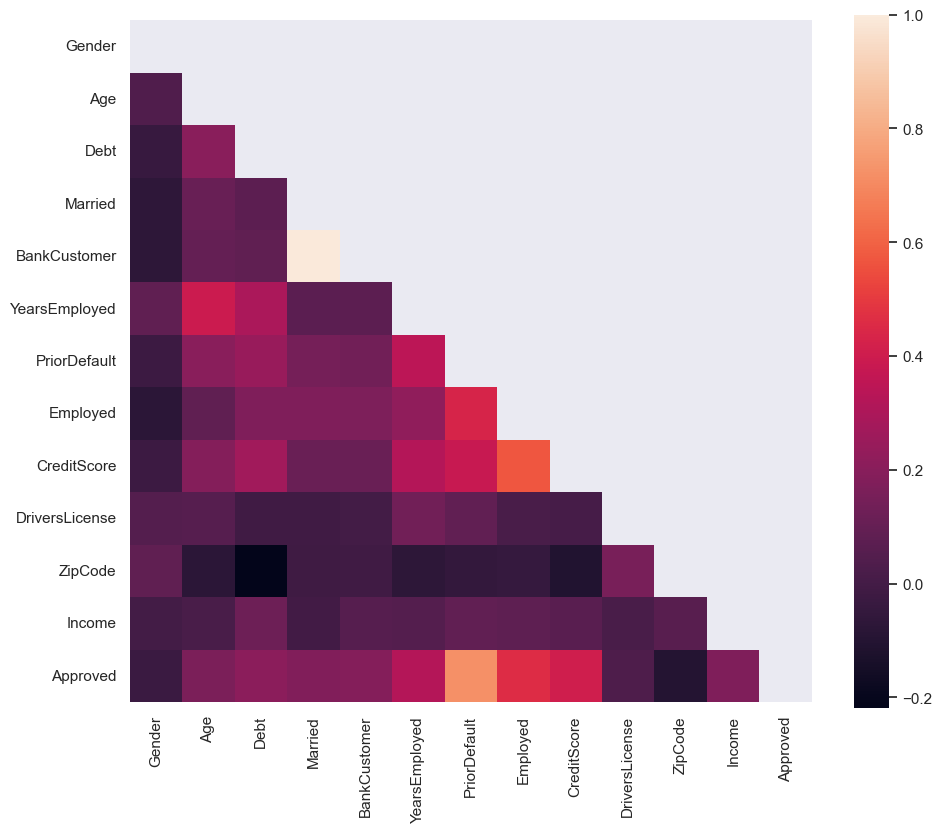

In [7]:
# Correlation matrix
corr = dataset.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Visualize correlation matrix
fig, ax = plt.subplots(figsize=(11, 9))
ax = sns.heatmap(corr, mask=mask, square=True, vmax=1)
plt.show()

## Credit Card Approvals

In [6]:
sns.set_theme(context="notebook", style="darkgrid", palette="Paired")

What is the relation between approved and declined credit cards applications?

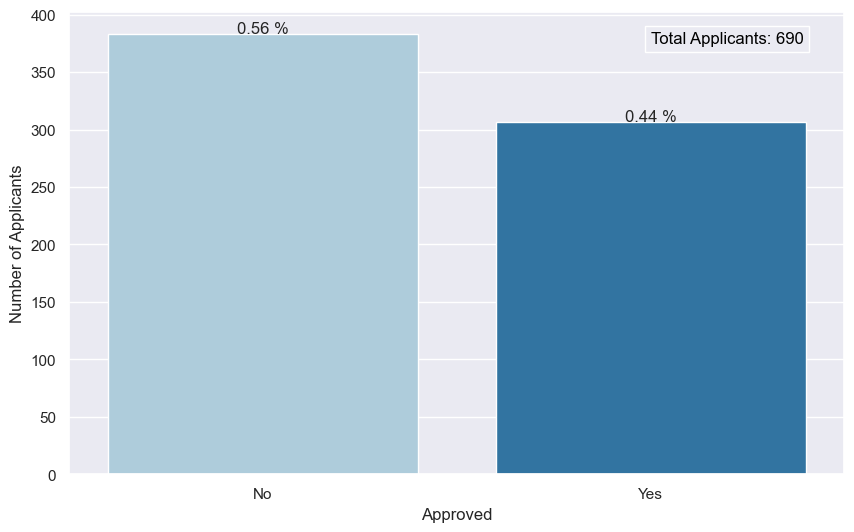

In [8]:
percentages = [ 1-dataset["Approved"].mean(), dataset["Approved"].mean()]
# print(percentages)

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(data=dataset,
                   x="Approved")
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height() + 0.5
    ax.annotate("{:0.2f} %".format(percentages[i]), (x, y), ha="center")
ax.set_xticklabels(["No", "Yes"])
ax.set_ylabel("Number of Applicants")
plt.text(1, 375, "Total Applicants: 690", ha="left", color="black",
         bbox=dict(facecolor="none", edgecolor="white"))

plt.savefig("../figures/approved.JPG", format="JPG")
plt.show()

In [9]:
dataset["Approved"].value_counts()

0    383
1    307
Name: Approved, dtype: int64

In [7]:
print("Total applicants: {}".format(dataset.shape[0]))

Total applicants: 690


We can see here that more people  got declined their credit card application out of 690 applicants.

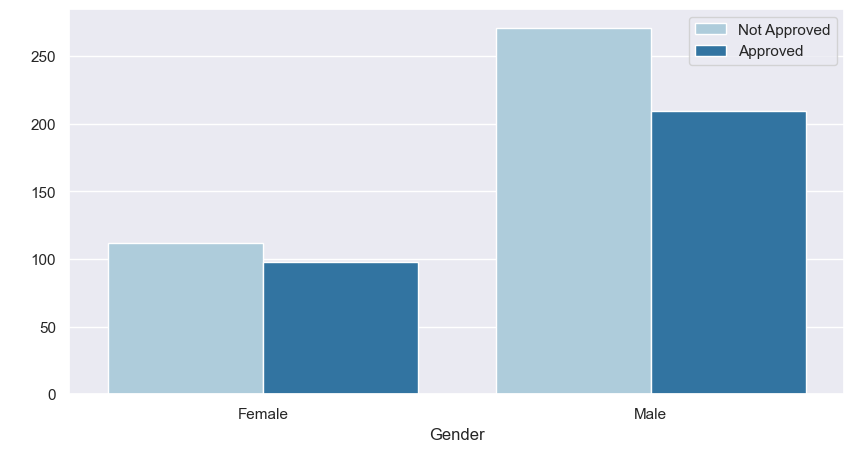

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
ax  = sns.countplot(data=dataset,
                    x="Gender", 
                    hue="Approved")
ax.set_xticklabels(["Female", "Male"])
plt.legend(labels=["Not Approved", "Approved"])
ax.set(ylabel=" ")
plt.show()

There is a greater number of male applicants. 

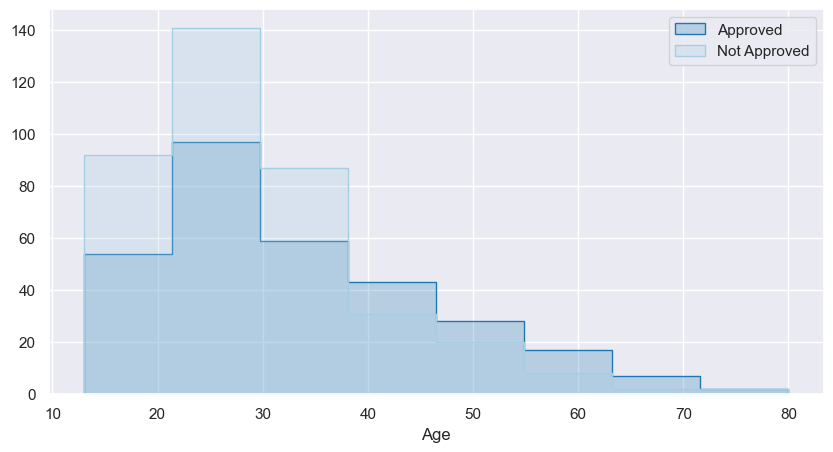

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.histplot(data=dataset, x="Age", 
                  bins=8, stat="count", legend=False,
                  hue="Approved", element="step")
ax.set_ylabel("")
plt.legend(labels=["Approved", "Not Approved"])
plt.show()

The majority of applicants fall between 20 - 30 years old.

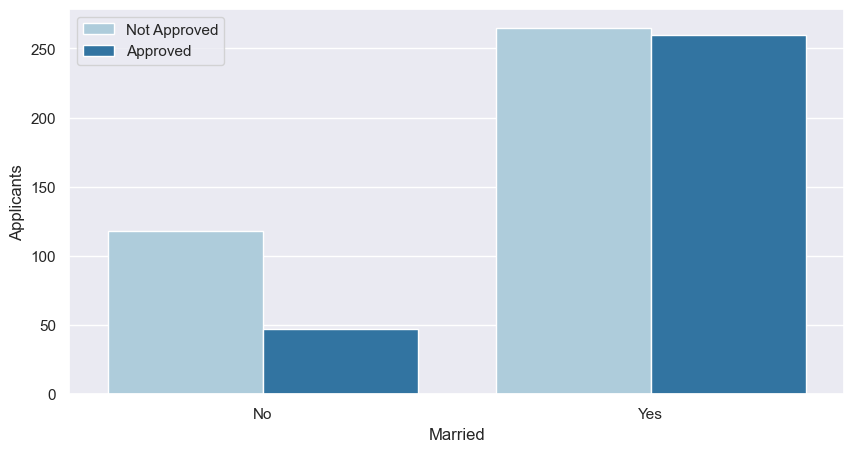

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(data=dataset, x="Married", hue="Approved")
ax.legend(labels=["Not Approved", "Approved"])
ax.set_xticklabels(["No", "Yes"])
ax.set_ylabel("Applicants")
plt.show()

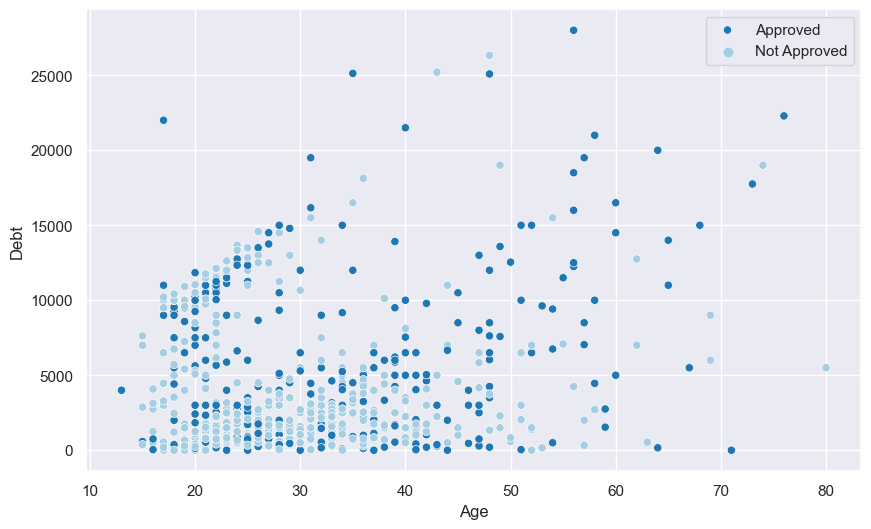

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(
    data=dataset, x="Age", y="Debt",  
    hue="Approved")
plt.legend(labels=["Approved", "Not Approved"])
plt.show()

There is no correlation between Debt and Age

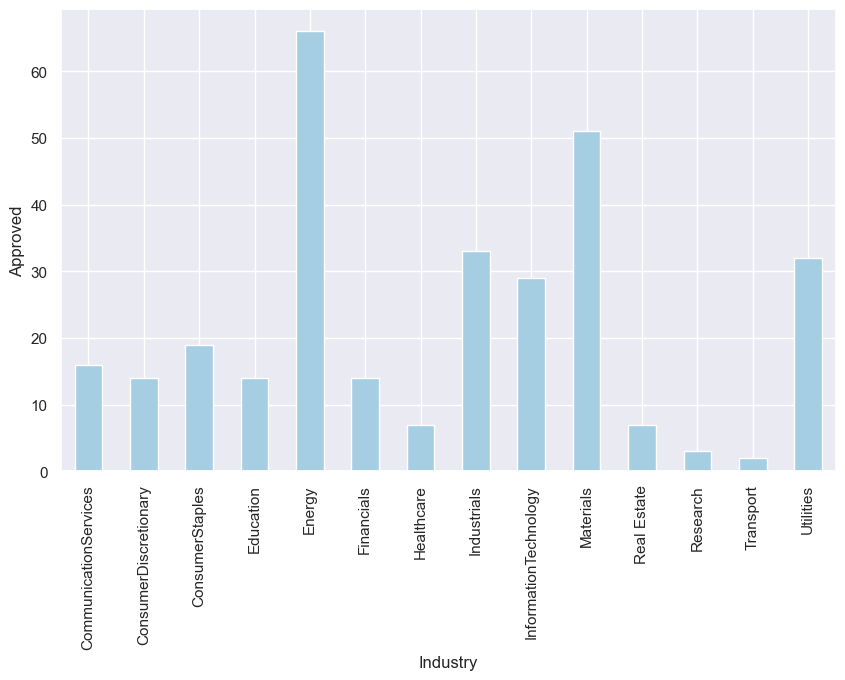

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = dataset.groupby(by=["Industry"])["Approved"].sum().plot(kind="bar")
ax.set_ylabel("Approved")
plt.show()

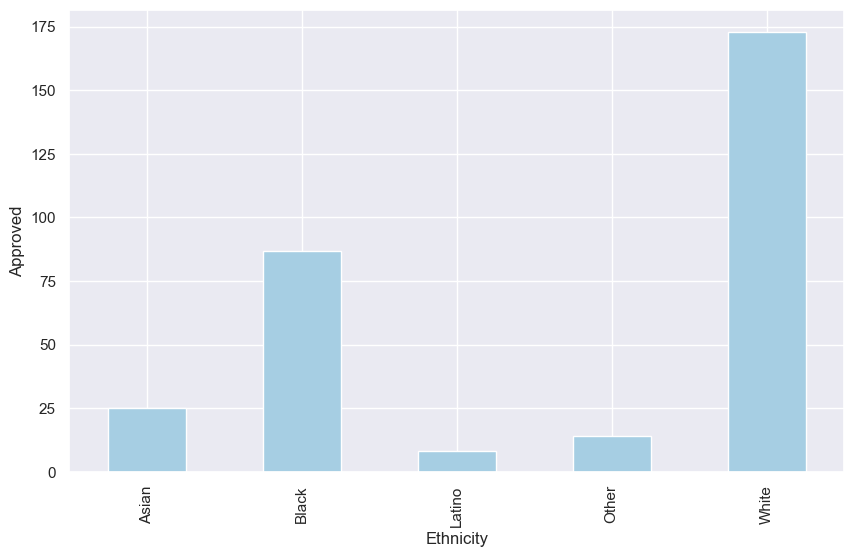

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = dataset.groupby(by=["Ethnicity"])["Approved"].sum().plot(kind="bar")
ax.set(ylabel="Approved")
plt.show()

In [14]:
dataset.groupby(by=["Ethnicity"])["ZipCode"].count()

Ethnicity
Asian      59
Black     138
Latino     57
Other      28
White     408
Name: ZipCode, dtype: int64

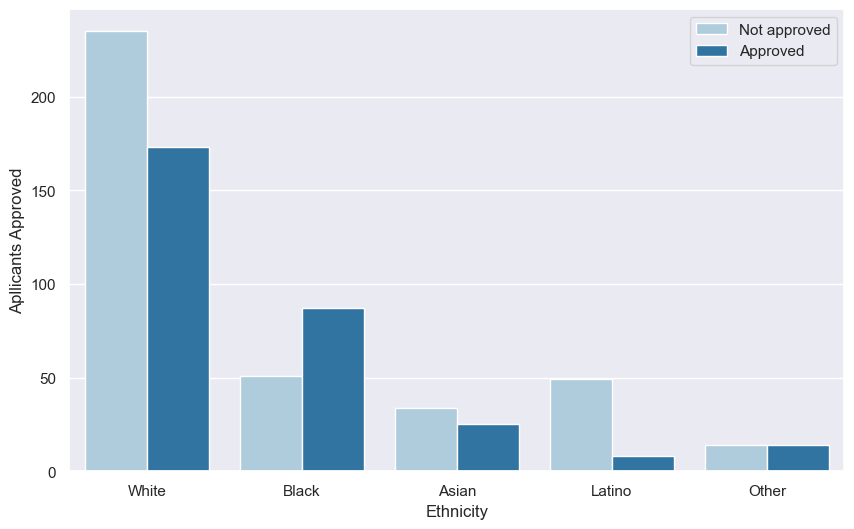

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(data=dataset, x="Ethnicity", hue="Approved")
ax.set(ylabel="Apllicants Approved")
plt.legend(labels=["Not approved", "Approved"])
plt.show()

In [16]:
dataset.groupby(by=["Ethnicity"])["Approved"].sum().sum()

307

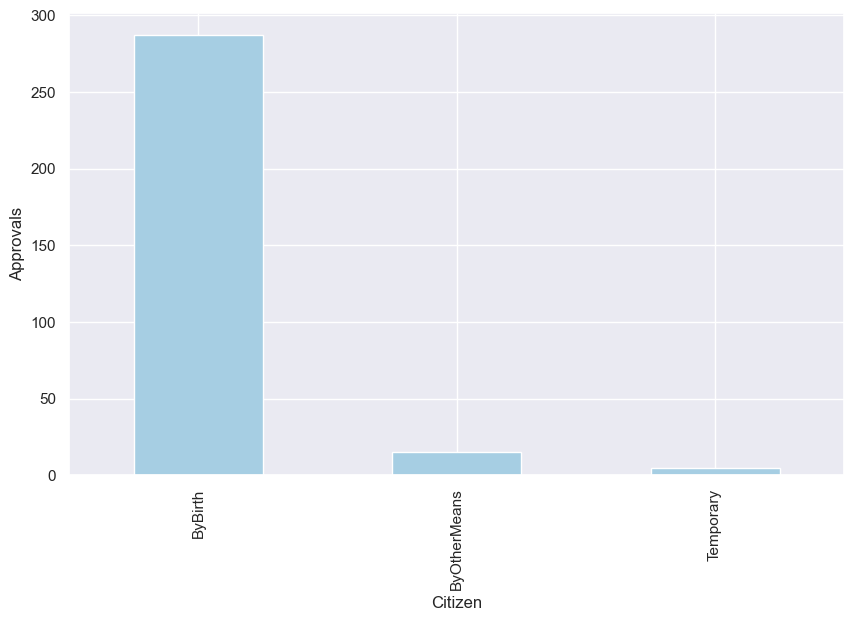

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = dataset.groupby(by=["Citizen"])["Approved"].sum().plot(kind="bar")
ax.set(ylabel="Approvals")
plt.show()

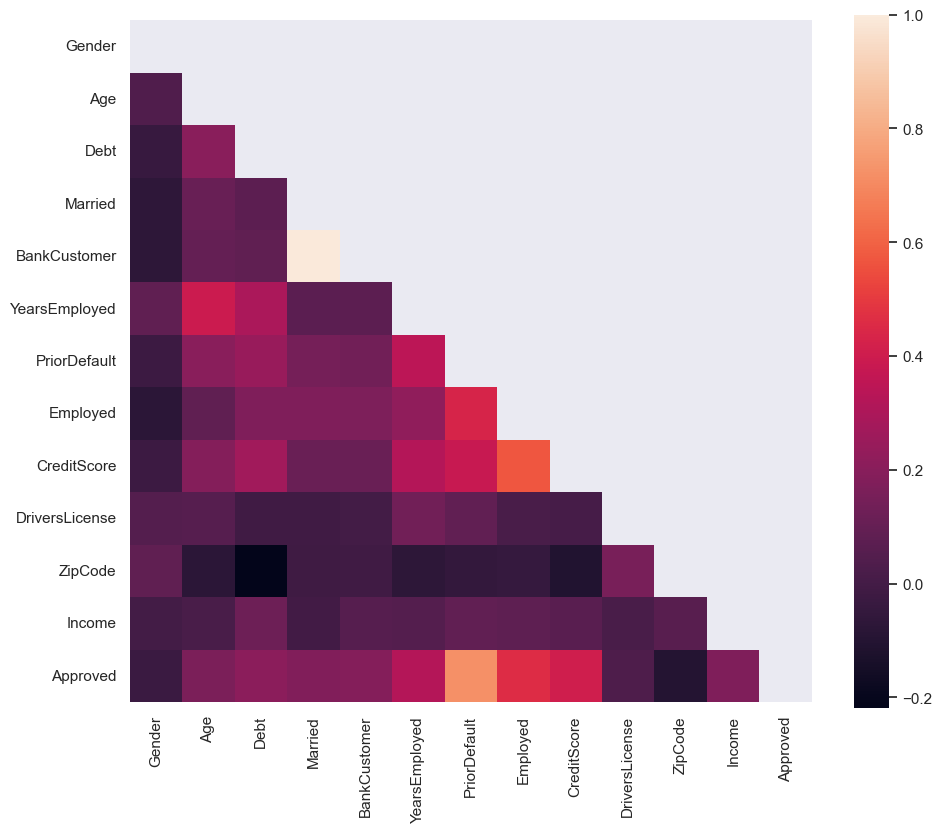

In [18]:
# Correlation matrix
corr = dataset.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Visualize correlation matrix
fig, ax = plt.subplots(figsize=(11, 9))
ax = sns.heatmap(corr, mask=mask, square=True, vmax=1)
plt.show()

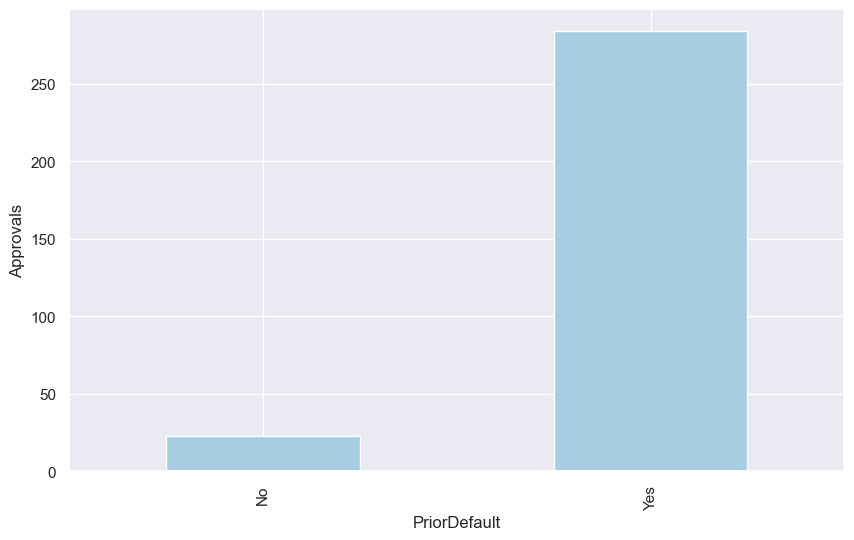

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = dataset.groupby(by=["PriorDefault"])["Approved"].sum().plot(kind="bar")
ax.set(ylabel="Approvals",
       xticklabels=["No", "Yes"])
plt.show()

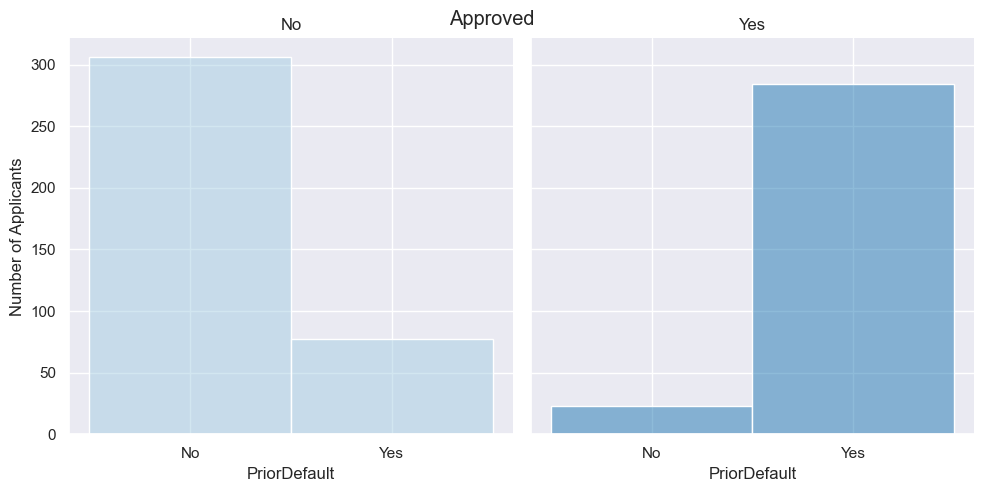

In [161]:
h = sns.displot(data=dataset, x="PriorDefault", kind="hist", discrete=True,
                hue="Approved", bins=2, col="Approved", legend=False)
h.set_ylabels("Number of Applicants")
h.set(xticks=[0, 1])
h.set_xticklabels(["No", "Yes"])
axes = h.axes.flatten()
axes[0].set_title("No")
axes[1].set_title("Yes")
h.figure.suptitle("Approved")
plt.show()
h.savefig(fname="../figures/PriorDefault.JPG", dpi=200, bbox_inches="tight")

In [20]:
dataset.groupby(by=["PriorDefault"])["Approved"].sum()

PriorDefault
0     23
1    284
Name: Approved, dtype: int64

In [21]:
dataset["Approved"].value_counts()

0    383
1    307
Name: Approved, dtype: int64

In [15]:
dataset["YearsEmployed"].head()

0    1.25
1    3.04
2    1.50
3    3.75
4    1.71
Name: YearsEmployed, dtype: float64

In [17]:
dataset["YearsEmployed"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 690 entries, 0 to 689
Series name: YearsEmployed
Non-Null Count  Dtype  
--------------  -----  
690 non-null    float64
dtypes: float64(1)
memory usage: 5.5 KB


<AxesSubplot:ylabel='Frequency'>

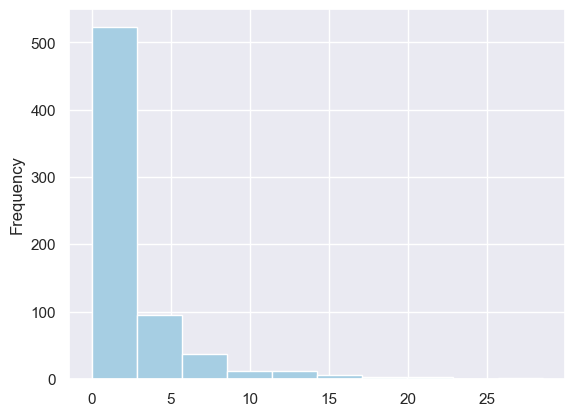

In [19]:
dataset["YearsEmployed"].plot(kind="hist")

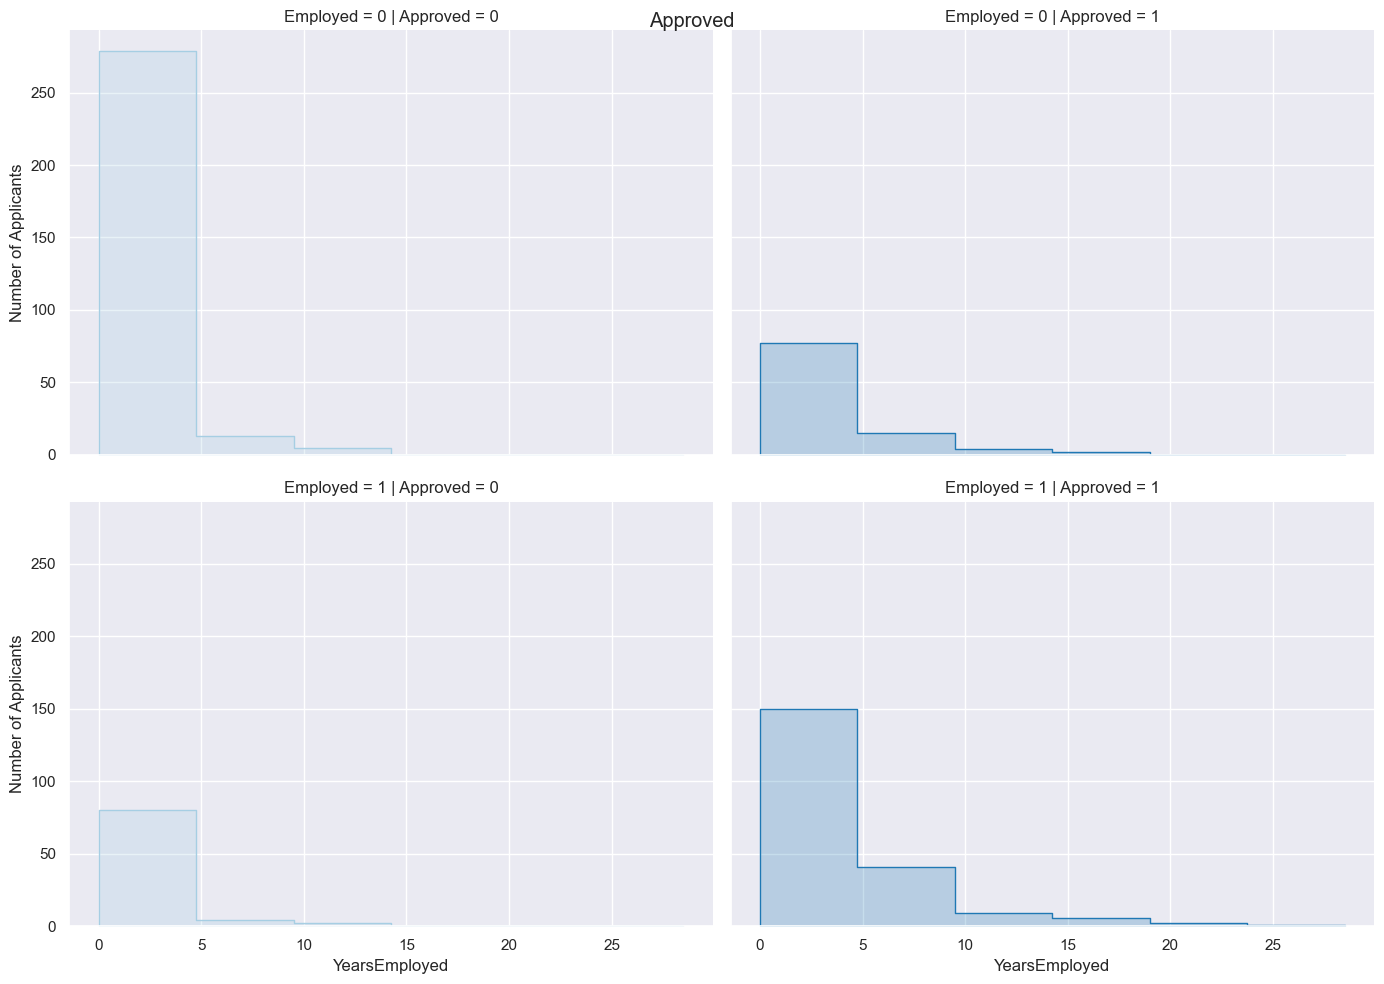

In [99]:
d = sns.displot(data=dataset, x="YearsEmployed", kind="hist", legend=False,
            aspect=1.4, bins=6,  col="Approved", row="Employed",
             element="step", hue="Approved")
d.figure.suptitle("Approved")
axes = d.axes.flatten()
# axes[0].set_title("No")
# axes[1].set_title("Yes")
d.set(ylabel="Number of Applicants")
plt.show()
d.savefig(fname="../figures/YearsEmployed.JPG", dpi=200, bbox_inches="tight")

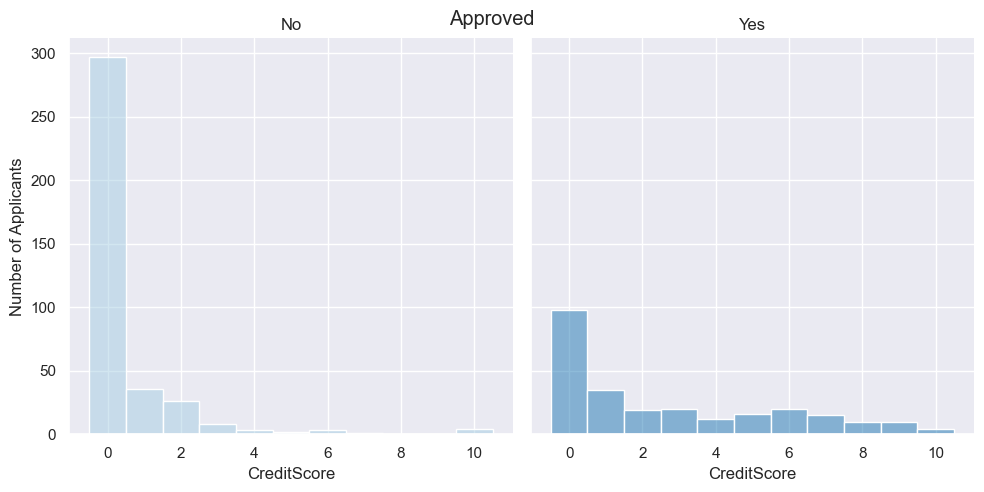

In [235]:
# Visualization of CreditScore and Approved result
c = sns.displot(data=dataset, x="CreditScore",bins=10, col="Approved", hue="Approved",
                kind="hist", legend=False, binrange=(0, 10), discrete=True)
c.set(ylabel="Number of Applicants")
axes = c.axes.flatten()
axes[0].set_title("No")
axes[1].set_title("Yes")
c.figure.suptitle("Approved")

plt.show()
c.savefig(fname="../figures/CreditScore.JPG", dpi=200, bbox_inches="tight")

(-5000.0, 60000.0)

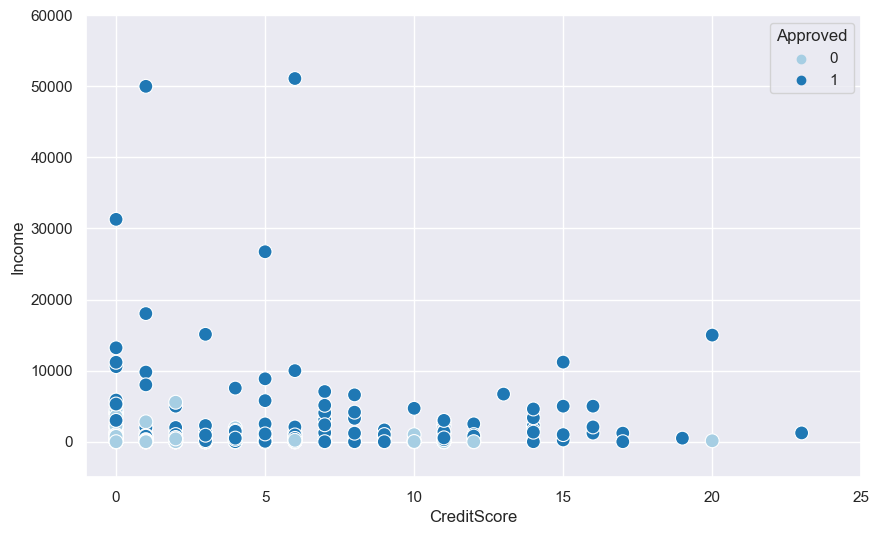

In [232]:
# Relation between CreditScore and Income for approved card applications
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.scatterplot(data=dataset, x="CreditScore", y="Income", hue="Approved", s=100)
ax.set_xlim(-1, 25)
ax.set_ylim(-5000, 60000)

In [227]:

dataset["CreditScore"].value_counts().sort_index()

0     395
1      71
2      45
3      28
4      15
5      18
6      23
7      16
8      10
9      10
10      8
11     19
12      8
13      1
14      8
15      4
16      3
17      2
19      1
20      2
23      1
40      1
67      1
Name: CreditScore, dtype: int64